In [1]:
import pandas as pd

In [2]:
#목표:
#클러스터링을 통해 지역별로 병원, 약국이 부족한 지역을 찾아낸다.
#기존 자료 중 병원, 약국 대비 반려동물 수를 비교하여 부족한 지역을 찾아낼 수 있도록 공식을 만든다.

In [3]:
#데이터 불러오기
pet_df = pd.read_csv("data/pet_data.csv")
hospitals_df = pd.read_csv("data/hospitals.csv")
pharmacies_df = pd.read_csv("data/pharmacies.csv")

In [4]:
import json
import geopandas as gpd
geo_df = gpd.GeoDataFrame.from_features(json.load(open("data/seongnam_geo.json", encoding="utf-8"))["features"])

In [5]:
# GeoJSON에서 중심 좌표 추출
geo_df["위도"] = geo_df.geometry.centroid.y
geo_df["경도"] = geo_df.geometry.centroid.x

In [6]:
pet_df.head(2)

,구별,동별,동물소유자수,반려동물수
0,분당구,구미동,2523,3241
1,분당구,궁내동,160,217


In [7]:
hospitals_df.head(2)

,구별,동별,사업장명,소재지도로명주소,위도,경도,지역명
0,분당구,구미동,분당필동물병원,경기도 성남시 분당구 금곡로15번길 1 (구미동),37.343838,127.110754,분당구 구미동
1,분당구,구미동,현대 동물병원,"경기도 성남시 분당구 성남대로 30, 111호 (구미동, 동아그린프라자)",37.338343,127.109435,분당구 구미동


In [8]:
pharmacies_df.head(2)

,구별,동별,사업장명,소재지도로명주소,위도,경도,지역명
0,분당구,구미동,무지개약국,"경기도 성남시 분당구 탄천상로151번길 20, 월드쇼핑,삼성SDA 지1층 C-1호 ...",37.340046,127.106971,분당구 구미동
1,분당구,구미동,미래팜대학약국,"경기도 성남시 분당구 돌마로 46, 101호 (구미동)",37.343772,127.119418,분당구 구미동


In [9]:
geo_df.head(2)

,geometry,adm_nm,adm_cd2,sgg,sido,sidonm,sggnm,adm_cd,gu_name,dong_name,위도,경도
0,"MULTIPOLYGON (((127.14458 37.43955, 127.14451 ...",경기도 성남시수정구 신흥1동,4113151000,41131,41,경기도,성남시수정구,31021510,수정구,신흥동,37.440825,127.140459
1,"MULTIPOLYGON (((127.15048 37.4568, 127.15013 3...",경기도 성남시수정구 신흥2동,4113152000,41131,41,경기도,성남시수정구,31021520,수정구,신흥동,37.449905,127.147958


In [10]:
# '지역명' 생성 (행정구역 정보에서 추출)
geo_df["지역명"] = geo_df["gu_name"] + " " + geo_df["dong_name"]

In [11]:
# '구별', '동별'을 활용해 지역명 생성 및 정리
pet_df["지역명"] = pet_df["구별"] + " " + pet_df["동별"]

In [12]:
hospitals_df["지역명"] = hospitals_df["구별"] + " " + hospitals_df["동별"]

In [13]:
pharmacies_df["지역명"] = pharmacies_df["구별"] + " " + pharmacies_df["동별"]

In [14]:
geo_df.head(2)

,geometry,adm_nm,adm_cd2,sgg,sido,sidonm,sggnm,adm_cd,gu_name,dong_name,위도,경도,지역명
0,"MULTIPOLYGON (((127.14458 37.43955, 127.14451 ...",경기도 성남시수정구 신흥1동,4113151000,41131,41,경기도,성남시수정구,31021510,수정구,신흥동,37.440825,127.140459,수정구 신흥동
1,"MULTIPOLYGON (((127.15048 37.4568, 127.15013 3...",경기도 성남시수정구 신흥2동,4113152000,41131,41,경기도,성남시수정구,31021520,수정구,신흥동,37.449905,127.147958,수정구 신흥동


In [15]:
pet_df.head(2)

,구별,동별,동물소유자수,반려동물수,지역명
0,분당구,구미동,2523,3241,분당구 구미동
1,분당구,궁내동,160,217,분당구 궁내동


In [16]:
pharmacies_df.head(2)

,구별,동별,사업장명,소재지도로명주소,위도,경도,지역명
0,분당구,구미동,무지개약국,"경기도 성남시 분당구 탄천상로151번길 20, 월드쇼핑,삼성SDA 지1층 C-1호 ...",37.340046,127.106971,분당구 구미동
1,분당구,구미동,미래팜대학약국,"경기도 성남시 분당구 돌마로 46, 101호 (구미동)",37.343772,127.119418,분당구 구미동


In [17]:
hospitals_df.head(2)

,구별,동별,사업장명,소재지도로명주소,위도,경도,지역명
0,분당구,구미동,분당필동물병원,경기도 성남시 분당구 금곡로15번길 1 (구미동),37.343838,127.110754,분당구 구미동
1,분당구,구미동,현대 동물병원,"경기도 성남시 분당구 성남대로 30, 111호 (구미동, 동아그린프라자)",37.338343,127.109435,분당구 구미동


In [18]:
# 데이터 병합
merged_df = geo_df.merge(pet_df, on="지역명", how="left")

In [19]:
merged_df

,geometry,adm_nm,adm_cd2,sgg,sido,sidonm,sggnm,adm_cd,gu_name,dong_name,위도,경도,지역명,구별,동별,동물소유자수,반려동물수
0,"MULTIPOLYGON (((127.14458 37.43955, 127.14451 ...",경기도 성남시수정구 신흥1동,4113151000,41131,41,경기도,성남시수정구,31021510,수정구,신흥동,37.440825,127.140459,수정구 신흥동,수정구,신흥동,2795.0,3757.0
1,"MULTIPOLYGON (((127.15048 37.4568, 127.15013 3...",경기도 성남시수정구 신흥2동,4113152000,41131,41,경기도,성남시수정구,31021520,수정구,신흥동,37.449905,127.147958,수정구 신흥동,수정구,신흥동,2795.0,3757.0
2,"MULTIPOLYGON (((127.15225 37.44259, 127.14783 ...",경기도 성남시수정구 신흥3동,4113153000,41131,41,경기도,성남시수정구,31021530,수정구,신흥동,37.442920,127.146462,수정구 신흥동,수정구,신흥동,2795.0,3757.0
3,"MULTIPOLYGON (((127.12019 37.4531, 127.12033 3...",경기도 성남시수정구 태평1동,4113154000,41131,41,경기도,성남시수정구,31021540,수정구,태평동,37.445546,127.123015,수정구 태평동,수정구,태평동,3599.0,4920.0
4,"MULTIPOLYGON (((127.13742 37.45307, 127.13715 ...",경기도 성남시수정구 태평2동,4113155000,41131,41,경기도,성남시수정구,31021550,수정구,태평동,37.447565,127.136398,수정구 태평동,수정구,태평동,3599.0,4920.0
5,"MULTIPOLYGON (((127.13613 37.4422, 127.13176 3...",경기도 성남시수정구 태평3동,4113156000,41131,41,경기도,성남시수정구,31021560,수정구,태평동,37.445571,127.132080,수정구 태평동,수정구,태평동,3599.0,4920.0
6,"MULTIPOLYGON (((127.14015 37.45308, 127.1403 3...",경기도 성남시수정구 태평4동,4113156100,41131,41,경기도,성남시수정구,31021570,수정구,태평동,37.448377,127.140826,수정구 태평동,수정구,태평동,3599.0,4920.0
7,"MULTIPOLYGON (((127.14079 37.43742, 127.14007 ...",경기도 성남시수정구 수진1동,4113157000,41131,41,경기도,성남시수정구,31021580,수정구,수진동,37.438339,127.135809,수정구 수진동,수정구,수진동,1778.0,2701.0
8,"MULTIPOLYGON (((127.13467 37.43466, 127.13252 ...",경기도 성남시수정구 수진2동,4113158000,41131,41,경기도,성남시수정구,31021590,수정구,수진동,37.436498,127.125634,수정구 수진동,수정구,수진동,1778.0,2701.0
9,"MULTIPOLYGON (((127.16085 37.45418, 127.15962 ...",경기도 성남시수정구 단대동,4113159000,41131,41,경기도,성남시수정구,31021600,수정구,단대동,37.454551,127.157077,수정구 단대동,수정구,단대동,791.0,1053.0


In [20]:
# 병원 및 약국 개수 계산 후 병합
hospital_counts = hospitals_df.groupby("지역명").size().reset_index(name="병원수")
pharmacy_counts = pharmacies_df.groupby("지역명").size().reset_index(name="약국수")

In [21]:
hospital_counts

,지역명,병원수
0,분당구 구미동,7
1,분당구 금곡동,4
2,분당구 대장동,2
3,분당구 백현동,5
4,분당구 분당동,1
5,분당구 삼평동,1
6,분당구 서현동,8
7,분당구 수내동,6
8,분당구 야탑동,7
9,분당구 운중동,5


In [22]:
merged_df = merged_df.merge(hospital_counts, on="지역명", how="left")
merged_df = merged_df.merge(pharmacy_counts, on="지역명", how="left")

In [23]:
merged_df

,geometry,adm_nm,adm_cd2,sgg,sido,sidonm,sggnm,adm_cd,gu_name,dong_name,위도,경도,지역명,구별,동별,동물소유자수,반려동물수,병원수,약국수
0,"MULTIPOLYGON (((127.14458 37.43955, 127.14451 ...",경기도 성남시수정구 신흥1동,4113151000,41131,41,경기도,성남시수정구,31021510,수정구,신흥동,37.440825,127.140459,수정구 신흥동,수정구,신흥동,2795.0,3757.0,7.0,18.0
1,"MULTIPOLYGON (((127.15048 37.4568, 127.15013 3...",경기도 성남시수정구 신흥2동,4113152000,41131,41,경기도,성남시수정구,31021520,수정구,신흥동,37.449905,127.147958,수정구 신흥동,수정구,신흥동,2795.0,3757.0,7.0,18.0
2,"MULTIPOLYGON (((127.15225 37.44259, 127.14783 ...",경기도 성남시수정구 신흥3동,4113153000,41131,41,경기도,성남시수정구,31021530,수정구,신흥동,37.442920,127.146462,수정구 신흥동,수정구,신흥동,2795.0,3757.0,7.0,18.0
3,"MULTIPOLYGON (((127.12019 37.4531, 127.12033 3...",경기도 성남시수정구 태평1동,4113154000,41131,41,경기도,성남시수정구,31021540,수정구,태평동,37.445546,127.123015,수정구 태평동,수정구,태평동,3599.0,4920.0,3.0,22.0
4,"MULTIPOLYGON (((127.13742 37.45307, 127.13715 ...",경기도 성남시수정구 태평2동,4113155000,41131,41,경기도,성남시수정구,31021550,수정구,태평동,37.447565,127.136398,수정구 태평동,수정구,태평동,3599.0,4920.0,3.0,22.0
5,"MULTIPOLYGON (((127.13613 37.4422, 127.13176 3...",경기도 성남시수정구 태평3동,4113156000,41131,41,경기도,성남시수정구,31021560,수정구,태평동,37.445571,127.132080,수정구 태평동,수정구,태평동,3599.0,4920.0,3.0,22.0
6,"MULTIPOLYGON (((127.14015 37.45308, 127.1403 3...",경기도 성남시수정구 태평4동,4113156100,41131,41,경기도,성남시수정구,31021570,수정구,태평동,37.448377,127.140826,수정구 태평동,수정구,태평동,3599.0,4920.0,3.0,22.0
7,"MULTIPOLYGON (((127.14079 37.43742, 127.14007 ...",경기도 성남시수정구 수진1동,4113157000,41131,41,경기도,성남시수정구,31021580,수정구,수진동,37.438339,127.135809,수정구 수진동,수정구,수진동,1778.0,2701.0,3.0,13.0
8,"MULTIPOLYGON (((127.13467 37.43466, 127.13252 ...",경기도 성남시수정구 수진2동,4113158000,41131,41,경기도,성남시수정구,31021590,수정구,수진동,37.436498,127.125634,수정구 수진동,수정구,수진동,1778.0,2701.0,3.0,13.0
9,"MULTIPOLYGON (((127.16085 37.45418, 127.15962 ...",경기도 성남시수정구 단대동,4113159000,41131,41,경기도,성남시수정구,31021600,수정구,단대동,37.454551,127.157077,수정구 단대동,수정구,단대동,791.0,1053.0,1.0,1.0


In [24]:
# NaN 값 0으로 대체
merged_df.fillna({"병원수": 0, "약국수": 0, "동물소유자수": 0, "반려동물수": 0}, inplace=True)

In [25]:
merged_df['dong_name'].unique()

array(['신흥동', '태평동', '수진동', '단대동', '산성동', '양지동', '복정동', '신촌동', '고등동',
       '시흥동', '성남동', '금광동', '은행동', '상대원동', '하대원동', '도촌동', '중앙동', '분당동',
       '수내동', '정자동', '서현동', '이매동', '야탑동', '구미동', '운중동', '금곡동', '삼평동',
       '판교동', '백현동', '위례동'], dtype=object)

In [26]:
#위례동은 데이터가 없어서 제외
merged_df = merged_df[merged_df['dong_name'] != '위례동']

In [27]:
merged_df

,geometry,adm_nm,adm_cd2,sgg,sido,sidonm,sggnm,adm_cd,gu_name,dong_name,위도,경도,지역명,구별,동별,동물소유자수,반려동물수,병원수,약국수
0,"MULTIPOLYGON (((127.14458 37.43955, 127.14451 ...",경기도 성남시수정구 신흥1동,4113151000,41131,41,경기도,성남시수정구,31021510,수정구,신흥동,37.440825,127.140459,수정구 신흥동,수정구,신흥동,2795.0,3757.0,7.0,18.0
1,"MULTIPOLYGON (((127.15048 37.4568, 127.15013 3...",경기도 성남시수정구 신흥2동,4113152000,41131,41,경기도,성남시수정구,31021520,수정구,신흥동,37.449905,127.147958,수정구 신흥동,수정구,신흥동,2795.0,3757.0,7.0,18.0
2,"MULTIPOLYGON (((127.15225 37.44259, 127.14783 ...",경기도 성남시수정구 신흥3동,4113153000,41131,41,경기도,성남시수정구,31021530,수정구,신흥동,37.442920,127.146462,수정구 신흥동,수정구,신흥동,2795.0,3757.0,7.0,18.0
3,"MULTIPOLYGON (((127.12019 37.4531, 127.12033 3...",경기도 성남시수정구 태평1동,4113154000,41131,41,경기도,성남시수정구,31021540,수정구,태평동,37.445546,127.123015,수정구 태평동,수정구,태평동,3599.0,4920.0,3.0,22.0
4,"MULTIPOLYGON (((127.13742 37.45307, 127.13715 ...",경기도 성남시수정구 태평2동,4113155000,41131,41,경기도,성남시수정구,31021550,수정구,태평동,37.447565,127.136398,수정구 태평동,수정구,태평동,3599.0,4920.0,3.0,22.0
5,"MULTIPOLYGON (((127.13613 37.4422, 127.13176 3...",경기도 성남시수정구 태평3동,4113156000,41131,41,경기도,성남시수정구,31021560,수정구,태평동,37.445571,127.132080,수정구 태평동,수정구,태평동,3599.0,4920.0,3.0,22.0
6,"MULTIPOLYGON (((127.14015 37.45308, 127.1403 3...",경기도 성남시수정구 태평4동,4113156100,41131,41,경기도,성남시수정구,31021570,수정구,태평동,37.448377,127.140826,수정구 태평동,수정구,태평동,3599.0,4920.0,3.0,22.0
7,"MULTIPOLYGON (((127.14079 37.43742, 127.14007 ...",경기도 성남시수정구 수진1동,4113157000,41131,41,경기도,성남시수정구,31021580,수정구,수진동,37.438339,127.135809,수정구 수진동,수정구,수진동,1778.0,2701.0,3.0,13.0
8,"MULTIPOLYGON (((127.13467 37.43466, 127.13252 ...",경기도 성남시수정구 수진2동,4113158000,41131,41,경기도,성남시수정구,31021590,수정구,수진동,37.436498,127.125634,수정구 수진동,수정구,수진동,1778.0,2701.0,3.0,13.0
9,"MULTIPOLYGON (((127.16085 37.45418, 127.15962 ...",경기도 성남시수정구 단대동,4113159000,41131,41,경기도,성남시수정구,31021600,수정구,단대동,37.454551,127.157077,수정구 단대동,수정구,단대동,791.0,1053.0,1.0,1.0


In [28]:
# 동일한 동명 병합 (반려동물 수 및 병원/약국 수 합산)
merged_df = merged_df.groupby("지역명", as_index=False).agg({
    "위도": "mean",
    "경도": "mean",
    "동물소유자수": "sum",
    "반려동물수": "sum",
    "병원수": "sum",
    "약국수": "sum"
})
# 구별 데이터 생성
merged_df["구별"] = merged_df["지역명"].str.split(" ").str[0]

In [29]:
merged_df

,지역명,위도,경도,동물소유자수,반려동물수,병원수,약국수,구별
0,분당구 구미동,37.347567,127.107514,5046.0,6482.0,14.0,24.0,분당구
1,분당구 금곡동,37.362748,127.096305,1629.0,2091.0,4.0,11.0,분당구
2,분당구 백현동,37.388250,127.110275,1313.0,1697.0,5.0,5.0,분당구
3,분당구 분당동,37.368463,127.144052,1522.0,2018.0,1.0,2.0,분당구
4,분당구 삼평동,37.401533,127.109149,1081.0,1333.0,1.0,15.0,분당구
5,분당구 서현동,37.380252,127.143510,5952.0,7426.0,16.0,44.0,분당구
6,분당구 수내동,37.373005,127.122857,7524.0,9312.0,18.0,57.0,분당구
7,분당구 야탑동,37.408326,127.134600,8838.0,11592.0,21.0,60.0,분당구
8,분당구 운중동,37.381892,127.058653,1157.0,1746.0,5.0,4.0,분당구
9,분당구 이매동,37.396804,127.127448,3992.0,4902.0,10.0,2.0,분당구


In [30]:
merged_df["병원당_반려동물수"] = merged_df["반려동물수"] + merged_df["동물소유자수"] / (merged_df["병원수"] + 1)
merged_df["약국당_반려동물수"] = merged_df["반려동물수"] + merged_df['동물소유자수'] / (merged_df["약국수"] + 1)

In [31]:
merged_df.head(2)

,지역명,위도,경도,동물소유자수,반려동물수,병원수,약국수,구별,병원당_반려동물수,약국당_반려동물수
0,분당구 구미동,37.347567,127.107514,5046.0,6482.0,14.0,24.0,분당구,6818.4,6683.84
1,분당구 금곡동,37.362748,127.096305,1629.0,2091.0,4.0,11.0,분당구,2416.8,2226.75


In [32]:
#지역명은 더는 필요없으므로 삭제
X=merged_df.drop(['지역명'], axis=1)

In [33]:
#스케일링

In [34]:
from sklearn.preprocessing import OneHotEncoder


encoder = OneHotEncoder(sparse_output=False)
encoded_columns = encoder.fit_transform(X[['구별']])
encoded_col_names = encoder.get_feature_names_out(['구별'])

In [35]:
# One-hot encoding 결과를 DataFrame으로 변환
df_encoded = pd.DataFrame(encoded_columns, columns=encoded_col_names)
X=pd.concat([X.drop(columns=['구별']), df_encoded], axis=1)

In [260]:
from sklearn.discriminant_analysis import StandardScaler


scaler = StandardScaler()
features_to_scale = ['동물소유자수', '반려동물수', '병원수', '약국수', '병원당_반려동물수', '약국당_반려동물수']
X[features_to_scale] = scaler.fit_transform(X[features_to_scale])

In [261]:
X.head(2)

,위도,경도,동물소유자수,반려동물수,병원수,약국수,병원당_반려동물수,약국당_반려동물수,구별_분당구,구별_수정구,구별_중원구
0,37.347567,127.107514,0.251841,0.225228,0.435040,0.185553,0.209404,0.151470,1.0,0.0,0.0
1,37.362748,127.096305,-0.468277,-0.480279,-0.338957,-0.325056,-0.486758,-0.508799,1.0,0.0,0.0


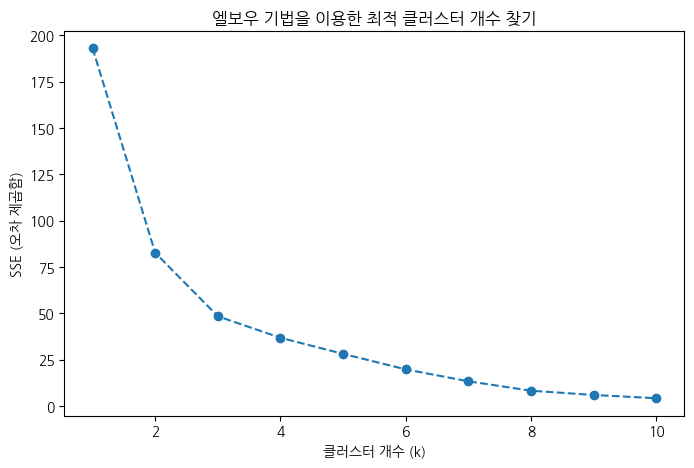

In [262]:
# 엘보우 기법을 통한 최적 클러스터 개수 찾기
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans
from sklearn.discriminant_analysis import StandardScaler

plt.rc('font', family='NanumGothic')
plt.rcParams['axes.unicode_minus'] = False

sse = []
k_range = range(1, 10+1)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X)
    sse.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(k_range, sse, marker='o', linestyle='--')
plt.xlabel('클러스터 개수 (k)')
plt.ylabel('SSE (오차 제곱합)')
plt.title('엘보우 기법을 이용한 최적 클러스터 개수 찾기')
plt.show()

In [263]:
kmeans=KMeans(n_clusters=5, random_state=42, n_init=10)

In [264]:
#클러스터링 결과 시각화
y_pred=kmeans.fit_predict(X)


In [265]:
y_pred

array([2, 0, 0, 0, 0, 2, 2, 2, 0, 0, 3, 0, 4, 4, 4, 4, 4, 4, 4, 2, 4, 1,
       0, 0, 2, 0, 0, 0, 0], dtype=int32)

In [266]:
# 정규화된 데이터 포함된 파일 저장
X.to_csv("data/scalerX_data.csv", index=False)
merged_df.to_csv("data/merged_data.csv", index=False)
# 클러스터링 모델 저장
import joblib 
joblib.dump(kmeans, "models/kmeans_model.pkl")

['models/kmeans_model.pkl']

In [267]:
merged_df['cluster']=y_pred

In [268]:
merged_df

,지역명,위도,경도,동물소유자수,반려동물수,병원수,약국수,구별,병원당_반려동물수,약국당_반려동물수,cluster
0,분당구 구미동,37.347567,127.107514,5046.0,6482.0,14.0,24.0,분당구,6818.400000,6683.840000,2
1,분당구 금곡동,37.362748,127.096305,1629.0,2091.0,4.0,11.0,분당구,2416.800000,2226.750000,0
2,분당구 백현동,37.388250,127.110275,1313.0,1697.0,5.0,5.0,분당구,1915.833333,1915.833333,0
3,분당구 분당동,37.368463,127.144052,1522.0,2018.0,1.0,2.0,분당구,2779.000000,2525.333333,0
4,분당구 삼평동,37.401533,127.109149,1081.0,1333.0,1.0,15.0,분당구,1873.500000,1400.562500,0
5,분당구 서현동,37.380252,127.143510,5952.0,7426.0,16.0,44.0,분당구,7776.117647,7558.266667,2
6,분당구 수내동,37.373005,127.122857,7524.0,9312.0,18.0,57.0,분당구,9708.000000,9441.724138,2
7,분당구 야탑동,37.408326,127.134600,8838.0,11592.0,21.0,60.0,분당구,11993.727273,11736.885246,2
8,분당구 운중동,37.381892,127.058653,1157.0,1746.0,5.0,4.0,분당구,1938.833333,1977.400000,0
9,분당구 이매동,37.396804,127.127448,3992.0,4902.0,10.0,2.0,분당구,5264.909091,6232.666667,0


In [57]:
hospitals_df.to_csv('data/hospitals.csv',index=False)
pharmacies_df.to_csv('data/pharmacies.csv',index=False)

In [56]:
hospitals_df.head(2)

,구별,동별,사업장명,소재지도로명주소,위도,경도,지역명
0,분당구,구미동,분당필동물병원,경기도 성남시 분당구 금곡로15번길 1 (구미동),37.343838,127.110754,분당구 구미동
1,분당구,구미동,현대 동물병원,"경기도 성남시 분당구 성남대로 30, 111호 (구미동, 동아그린프라자)",37.338343,127.109435,분당구 구미동
